### 1. Chargement des données à l'aide de la bibliothèque Pandas.

- Afficher les 10 premiére lignes
- Vérifier le type et la structure des colonnes.

In [928]:
import pandas as pd
from os import getcwd

df = pd.read_csv(getcwd() + '/../data/raw/assurance-maladie.csv')

print(df.head(10))
print()
print(df.columns)
print()
print(df.dtypes)



    age     sex     bmi  children smoker     region      charges
0  19.0  female  27.900       0.0    yes  southwest  16884.92400
1  18.0    male  33.770       1.0     no  southeast   1725.55230
2  28.0    male  33.000       3.0     no  southeast   4449.46200
3  33.0    male  22.705       0.0     no  northwest  21984.47061
4  32.0    male  28.880       0.0     no  northwest   3866.85520
5  31.0  female  25.740       0.0     no  southeast   3756.62160
6  46.0  female  33.440       1.0     no  southeast   8240.58960
7  37.0  female  27.740       3.0     no  northwest   7281.50560
8  37.0    male  29.830       2.0     no  northeast   6406.41070
9  60.0  female  25.840       0.0     no  northwest  28923.13692

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object


### 2. Analyse exploratoire des données (EDA)
##### 2.1. Comprendre la structure générale du jeu de données (types de données, dimensions, aperçus).
- Afficher des details sur les données en inclus leurs types
- Afficher les dimensions : nombre des lignes, nombres des colonnes 

In [929]:
print(df.info())

print()

print(df.shape) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   sex       1336 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   float64
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1336 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB
None

(1338, 7)


##### 2.2. Affectuer une analyse descriptive des données (moyennes, médianes, écarts-types pour les variables numériques ; fréquences pour les catégoriques).

Variables numériques:
- Moyennes (mean)
- Médianes (50%)
- Ecarts-types (std)

In [930]:
stats = df.describe()

print(stats.loc['mean'])
print()
print(stats.loc['50%'])
print()
print(stats.loc['std'])

age            39.193717
bmi            30.651402
children        1.094241
charges     13267.531908
Name: mean, dtype: float64

age           39.00000
bmi           30.40000
children       1.00000
charges     9369.61575
Name: 50%, dtype: float64

age            14.046779
bmi             6.084659
children        1.205689
charges     12117.852555
Name: std, dtype: float64


Variables qualitatives:
- Fréquences des catégoriques (sex, region, smoker)

In [931]:
print(df["sex"].value_counts())
print()
print(df["region"].value_counts())
print()
print(df["smoker"].value_counts())

sex
male      675
female    661
Name: count, dtype: int64

region
southeast    364
northwest    325
southwest    324
northeast    324
Name: count, dtype: int64

smoker
no     1063
yes     274
Name: count, dtype: int64


##### 2.3. Identifier les valeurs manquantes et les doublons.
- Dataframe représentant les lignes qui contient des valeurs manquantes
- Nombre des valeurs null pour chaque colonne

In [932]:
print(df[df.isnull().any(axis=1)])

print()

print(df.isnull().sum())

      age     sex    bmi  children smoker     region     charges
530   NaN    male  42.13       1.0    yes  southeast  48675.5177
533  37.0    male  36.19       0.0     no  southeast         NaN
537  46.0  female  30.20       2.0     no        NaN   8825.0860
541  20.0     NaN  31.79       2.0     no  southeast   3056.3881
545  49.0    male  25.84       NaN    yes  northwest  23807.2406
547  54.0  female    NaN       2.0     no  southwest  11538.4210
550  63.0     NaN  30.80       0.0     no  southwest  13390.5590
553  52.0  female  31.73       2.0    NaN  northwest         NaN

age         1
sex         2
bmi         1
children    1
smoker      1
region      1
charges     2
dtype: int64


Dataframe représentant les lignes doublons

In [933]:
print(df[df.duplicated()])

      age   sex    bmi  children smoker     region    charges
581  19.0  male  30.59       0.0     no  northwest  1639.5631


##### 2.4. Analyser la distribution des variables numériques (ex. : histogrammes avec Matplotlib/Seaborn).

Diagramme circulaire qui affiche la distribution des genres

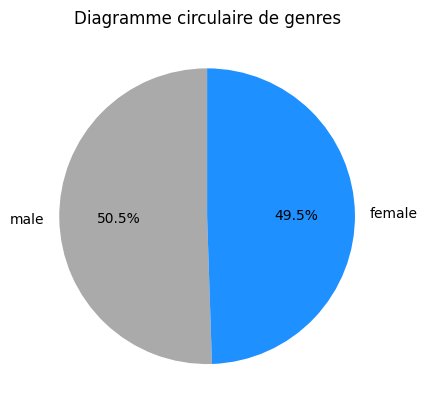

sex
male      675
female    661
Name: count, dtype: int64


In [934]:
import matplotlib.pyplot as plt

# Gender Diagram

sex_counts = df["sex"].value_counts()

plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%", startangle=90, colors=["#AAA", "dodgerblue"])
plt.title("Diagramme circulaire de genres")
plt.show()

print(sex_counts)


Diagramme circulaire qui affiche la distribution des habitudes tabagiques

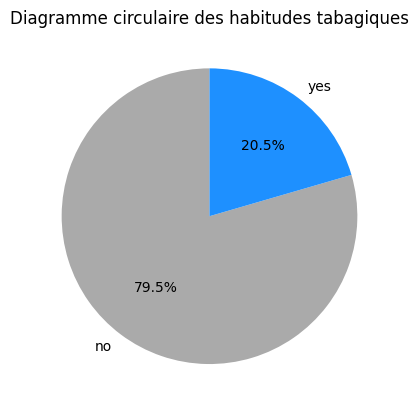

smoker
no     1063
yes     274
Name: count, dtype: int64


In [935]:
# Smoker diagram

smoker_counts = df["smoker"].value_counts()

plt.pie(smoker_counts, labels=smoker_counts.index, autopct="%1.1f%%", startangle=90, colors=["#AAA", "dodgerblue"])
plt.title("Diagramme circulaire des habitudes tabagiques")
plt.show()

print(smoker_counts)

Diagramme circulaire qui affiche la distribution des regions

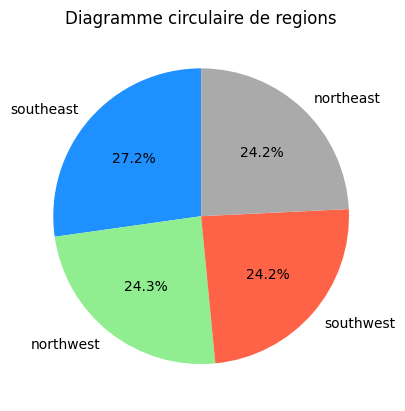

region
southeast    364
northwest    325
southwest    324
northeast    324
Name: count, dtype: int64


In [936]:
# Region diagram

region_counts = df["region"].value_counts()

plt.pie(region_counts, labels=region_counts.index, autopct="%1.1f%%", startangle=90, colors=["dodgerblue", "lightgreen", "#FF6347", '#AAA'])
plt.title("Diagramme circulaire de regions")
plt.show()

print(region_counts)


Histogramme qui affiche la distribution de nombre d’enfants

In [937]:
plt.hist(df["children"], bins=range(0, df["children"].max() + 2), rwidth=0.4, color="skyblue", edgecolor="black", align="left")
plt.title("Histogramme de nombre d'enfants")
plt.xlabel("Children Number")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)

mediane = plt.axvline(df["children"].median())
mediane.set_color('red')
mediane.set_label('Mediane')

moyenne = plt.axvline(df["children"].mean())
moyenne.set_color('green')
moyenne.set_label('Moyenne')

plt.legend()
plt.show()

print(df['children'].value_counts(), '\n')
print('Moyenne', df["children"].mean())
print('Mediane', df["children"].median())

TypeError: 'numpy.float64' object cannot be interpreted as an integer

Histogramme qui affiche la distribution des ages

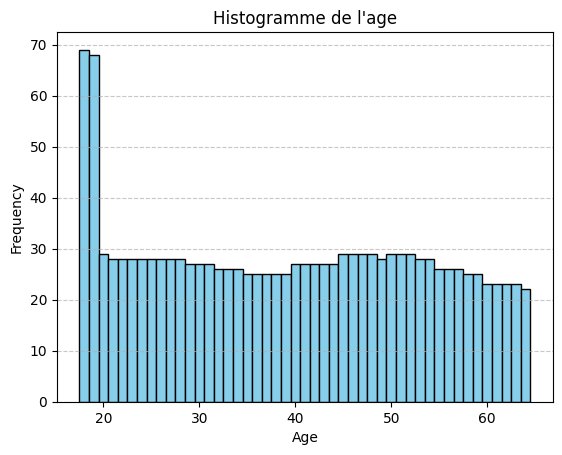

Min: 18
Max: 64
Moyenne: 39.20702541106129
Mediane: 39.0

18.0 - 69.0
19.0 - 68.0
20.0 - 29.0
21.0 - 28.0
22.0 - 28.0
23.0 - 28.0
24.0 - 28.0
25.0 - 28.0
26.0 - 28.0
27.0 - 28.0
28.0 - 28.0
29.0 - 27.0
30.0 - 27.0
31.0 - 27.0
32.0 - 26.0
33.0 - 26.0
34.0 - 26.0
35.0 - 25.0
36.0 - 25.0
37.0 - 25.0
38.0 - 25.0
39.0 - 25.0
40.0 - 27.0
41.0 - 27.0
42.0 - 27.0
43.0 - 27.0
44.0 - 27.0
45.0 - 29.0
46.0 - 29.0
47.0 - 29.0
48.0 - 29.0
49.0 - 28.0
50.0 - 29.0
51.0 - 29.0
52.0 - 29.0
53.0 - 28.0
54.0 - 28.0
55.0 - 26.0
56.0 - 26.0
57.0 - 26.0
58.0 - 25.0
59.0 - 25.0
60.0 - 23.0
61.0 - 23.0
62.0 - 23.0
63.0 - 23.0
64.0 - 22.0


In [ ]:
counts, bins, _ = plt.hist(df["age"], bins=range(df["age"].min(), df["age"].max() + 2, 1), color="skyblue", edgecolor="black", align="left")
plt.title("Histogramme de l'age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

print('Min:', df["age"].min())
print('Max:', df["age"].max())
print('Moyenne:', df["age"].mean())
print('Mediane:', df["age"].median())

print()

for i, j in zip(bins, counts):
    print(i, '-', j)


Histogramme qui affiche la distribution de l’indice de masse corporelle

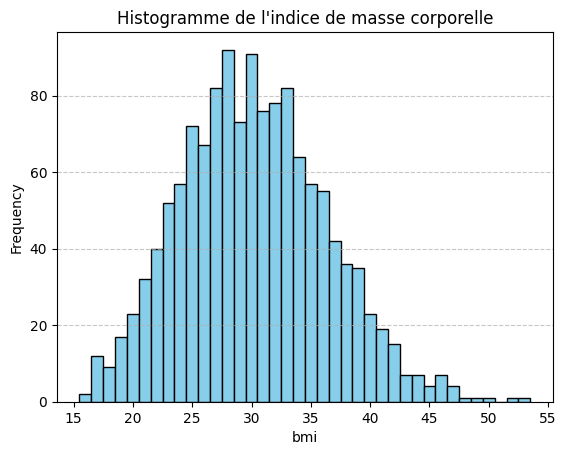

Bins:  [16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.
 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51.
 52. 53. 54.]
Counts:  [ 2. 12.  9. 17. 23. 32. 40. 52. 57. 72. 67. 82. 92. 73. 91. 76. 78. 82.
 64. 57. 55. 42. 36. 35. 23. 19. 15.  7.  7.  4.  7.  4.  1.  1.  1.  0.
  1.  1.] 

Min: 15.96
Max: 53.13
Moyenne: 30.66339686098655
Mediane: 30.4


In [ ]:
counts, bins, _ = plt.hist(df["bmi"], bins=range(round(df["bmi"].min()), round(df["bmi"].max()) + 2, 1), color="skyblue", edgecolor="black", align="left")
plt.title("Histogramme de l'indice de masse corporelle")
plt.xlabel("bmi")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

print('Bins: ', bins)
print('Counts: ', counts, '\n')

print('Min:', df["bmi"].min())
print('Max:', df["bmi"].max())
print('Moyenne:', df["bmi"].mean())
print('Mediane:', df["bmi"].median())


Histogramme qui affiche la distribution des charges

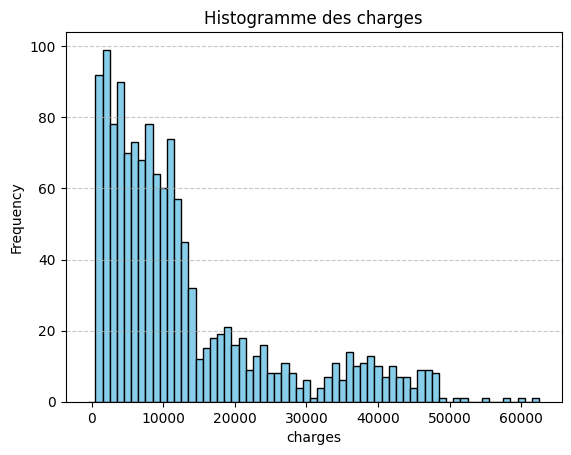

Min: 1121.8739
Max: 63770.42801
Moyenne: 13270.422265141257
Mediane: 9382.033

0.0  -  0.0
1000.0  -  92.0
2000.0  -  99.0
3000.0  -  78.0
4000.0  -  90.0
5000.0  -  70.0
6000.0  -  73.0
7000.0  -  68.0
8000.0  -  78.0
9000.0  -  64.0
10000.0  -  60.0
11000.0  -  74.0
12000.0  -  57.0
13000.0  -  45.0
14000.0  -  32.0
15000.0  -  12.0
16000.0  -  15.0
17000.0  -  18.0
18000.0  -  19.0
19000.0  -  21.0
20000.0  -  16.0
21000.0  -  18.0
22000.0  -  9.0
23000.0  -  13.0
24000.0  -  16.0
25000.0  -  8.0
26000.0  -  8.0
27000.0  -  11.0
28000.0  -  8.0
29000.0  -  4.0
30000.0  -  6.0
31000.0  -  1.0
32000.0  -  4.0
33000.0  -  7.0
34000.0  -  11.0
35000.0  -  6.0
36000.0  -  14.0
37000.0  -  10.0
38000.0  -  11.0
39000.0  -  13.0
40000.0  -  10.0
41000.0  -  7.0
42000.0  -  10.0
43000.0  -  7.0
44000.0  -  7.0
45000.0  -  4.0
46000.0  -  9.0
47000.0  -  9.0
48000.0  -  8.0
49000.0  -  1.0
50000.0  -  0.0
51000.0  -  1.0
52000.0  -  1.0
53000.0  -  0.0
54000.0  -  0.0
55000.0  -  1.0
56000.0

In [ ]:
counts, bins, _ = plt.hist(df["charges"], bins=range(0, round(df["charges"].max()) + 2, 1000), color="skyblue", edgecolor="black", align="left")
plt.title("Histogramme des charges")
plt.xlabel("charges")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

print('Min:', df["charges"].min())
print('Max:', df["charges"].max())
print('Moyenne:', df["charges"].mean())
print('Mediane:', df["charges"].median())

print()

for i, j in zip(bins, counts):
    print(i, ' - ', j)



##### 2.5. Étudier les relations entre variables à l'aide de matrices de corrélation et de visualisations (ex. : pairplots ou heatmaps).

Matrice de corrélation 

In [ ]:
corr = df.corr(numeric_only=True)

print(corr)

               age       bmi  children   charges
age       1.000000  0.105937  0.042193  0.297667
bmi       0.105937  1.000000  0.011763  0.198913
children  0.042193  0.011763  1.000000  0.068015
charges   0.297667  0.198913  0.068015  1.000000


Heatmaps

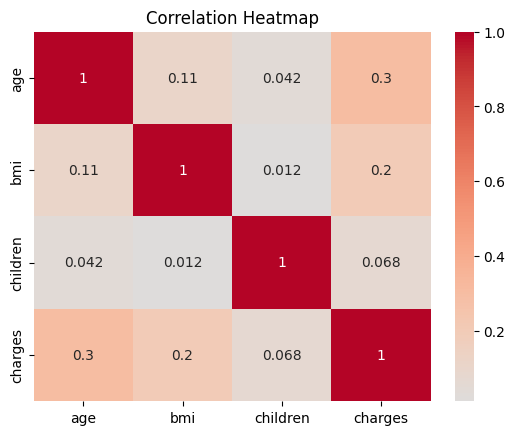

In [ ]:
import seaborn as sns

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


### 3. Prétraitement des données
##### 3.1. Gestion des valeurs manquantes

Pour les statistiques quantitatives, on utilise la fonction **fillna()** pour remplacer les valeurs manquantes par le mediane ou le moyen. 

In [ ]:
df['children'] = df['children'].fillna(df['children'].median())
df['age'] = df['age'].fillna(df['age'].median())
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['charges'] = df['charges'].fillna(df['charges'].mean())

Pour les statistiques qualitatives, on utilise la fonction **fillna()** pour remplacer les valeurs manquantes par le mode (la valeur la plus frequente)

In [ ]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['region'] = df['region'].fillna(df['region'].mode()[0])
df['smoker'] = df['smoker'].fillna(df['smoker'].mode()[0])


##### 3.2. Suppression des doublons

In [ ]:
df = df[~df.duplicated()]

##### 3.3. Détection et gestion des valeurs aberrantes

Affichage des diagrammes de Boîte à moustaches de:
- BMI
- Age
- Nombre des enfants

Les diagrammes montrent que la distribution du BMI présente des valeurs aberrantes.

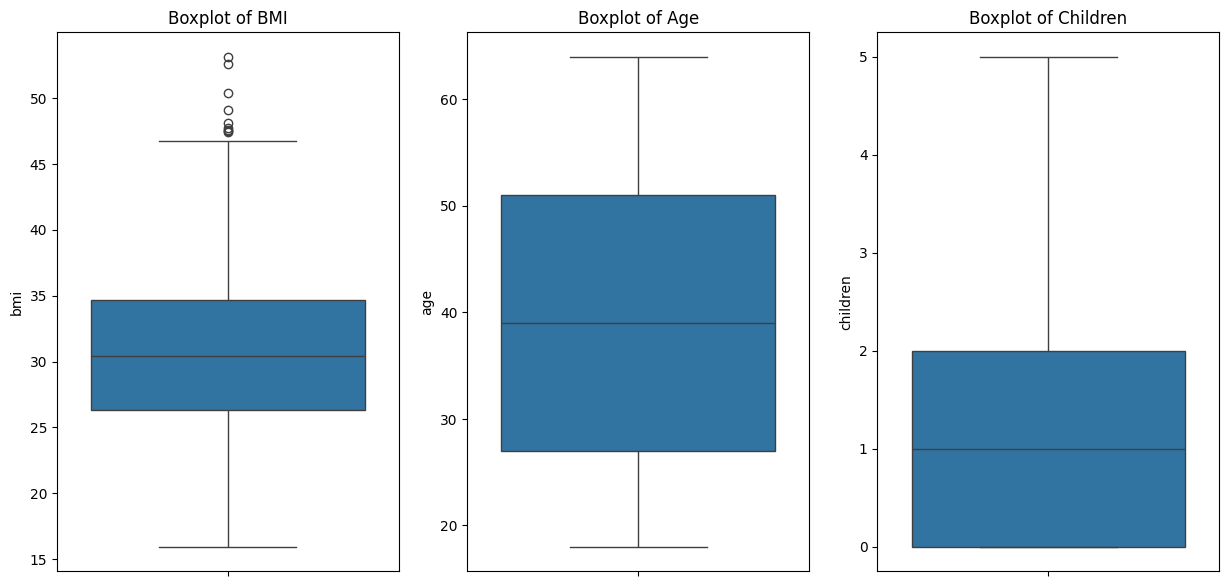

In [ ]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
sns.boxplot(y="bmi", data=df)
plt.title("Boxplot of BMI")

plt.subplot(1, 3, 2)
sns.boxplot(y="age", data=df)
plt.title("Boxplot of Age")

plt.subplot(1, 3, 3)
sns.boxplot(y="children", data=df)
plt.title("Boxplot of Children")

plt.show()

Identification de valeurs aberrantes de bmi utilisant Z-Score

In [ ]:
ecart = df['bmi'].std()
mean = df["bmi"].mean()

dfs = df[((df['bmi'] - mean) / ecart).abs() > 3]['bmi']

print(dfs)



116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64


Identification de valeurs aberrantes de bmi utilisant IQR

In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3 - Q1

outliers = df[(df['bmi'] > Q3 + 1.5 * IQR) | (df['bmi'] < Q1 - 1.5 * IQR)]

print(outliers)

       age     sex    bmi  children smoker     region      charges
116   58.0    male  49.06       0.0     no  southeast  11381.32540
286   46.0  female  48.07       2.0     no  northeast   9432.92530
401   47.0    male  47.52       1.0     no  southeast   8083.91980
543   54.0  female  47.41       0.0    yes  southeast  63770.42801
847   23.0    male  50.38       1.0     no  southeast   2438.05520
860   37.0  female  47.60       2.0    yes  southwest  46113.51100
1047  22.0    male  52.58       1.0    yes  southeast  44501.39820
1088  52.0    male  47.74       1.0     no  southeast   9748.91060
1317  18.0    male  53.13       0.0     no  southeast   1163.46270


Supression de valeurs aberrantes de bmi

In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3 - Q1

df = df[(df['bmi'] <= Q3 + 1.5 * IQR) & (df['bmi'] >= Q1 - 1.5 * IQR)]


Ajouter une colonne qui represente le logarithme des charges

In [ ]:
import numpy as np

df["log_charges"] = np.log(df["charges"])

Representation graphique de log_charges

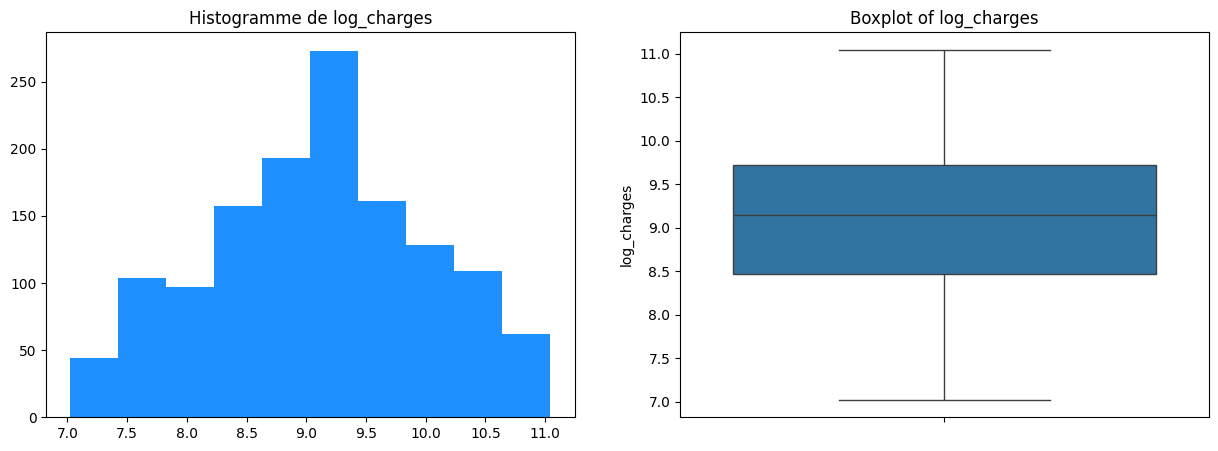

Max:  11.044406702204412
Min:  7.02275569117477


In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.hist(df['log_charges'], color="dodgerblue")
plt.title("Histogramme de log_charges")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["log_charges"])
plt.title("Boxplot of log_charges")
plt.show()

print("Max: ", df['log_charges'].max())
print("Min: ", df['log_charges'].min())

##### 3.4. Encoder les variables catégoriques (sexe, smoker, région) avec one-hot encoding ou label encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder

df = pd.get_dummies(df, columns=["region"])
df = pd.get_dummies(df, columns=["sex"])

encoder = LabelEncoder()
df["smoker_encoded"] = encoder.fit_transform(df["smoker"])

##### 3.5. Diviser les données en ensembles d'entraînement et de test (80% / 20%)

In [ ]:
from sklearn.model_selection import train_test_split


y = df["log_charges"]
X = df.drop(["log_charges", "smoker", "charges"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train:\n", X_train.shape)
print("X_test:\n", X_test.shape)
print("y_train:\n", y_train.shape)
print("y_test:\n", y_test.shape)

KeyError: 'log_charges'

##### 3.6. Appliquer une normalisation (MinMaxScaler) ou une standardisation (StandardScaler) sur les variables numériques pour harmoniser les échelles.
Dans cette etape on applique la normalisation sur les données numériques seulement

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = ["age", "children", "bmi"]

X_train_normalised = X_train.copy()
X_test_normalised = X_test.copy()

scaler = MinMaxScaler()
X_train_normalised[numeric_cols] = scaler.fit_transform(X_train_normalised[numeric_cols])
X_test_normalised[numeric_cols] = scaler.transform(X_test_normalised[numeric_cols])


On applique la standarisation sur les données numériques

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ["age", "children", "bmi"]

X_train_standarized = X_train.copy()
X_test_standarized = X_test.copy()

scaler = StandardScaler()
X_train_standarized[numeric_cols] = scaler.fit_transform(X_train_standarized[numeric_cols])
X_test_standarized[numeric_cols] = scaler.transform(X_test_standarized[numeric_cols])

### 4. Entraîner et Évaluer les performances des modèles

Linear Regression

In [952]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()

linear_regression_model.fit(X_train_normalised, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(random_state=42)

random_forest_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


XGBoost 

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


SVR

In [ ]:
from sklearn.svm import SVR

svr_model = SVR()

svr_model.fit(X_train_standarized, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


On utilise des pipelines pour grouper les etapes de prétraitement et d'entrainement:

In [ ]:
from sklearn.pipeline import Pipeline 

linear_reg_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lin_reg', LinearRegression())
])

linear_reg_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('lin_reg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [ ]:
from sklearn.pipeline import Pipeline 

rand_forest_pipeline = Pipeline([
    ('rand_forest', RandomForestRegressor(random_state=42))
])

rand_forest_pipeline.fit(X_train, y_train)

,steps,"[('rand_forest', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0


In [ ]:
from sklearn.pipeline import Pipeline 

xgboost_pipeline = Pipeline([
    ('xgboost', XGBRegressor(random_state=42))
])

xgboost_pipeline.fit(X_train, y_train)


,steps,"[('xgboost', ...)]"
,transform_input,None
,memory,None
,verbose,False
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None


In [ ]:

from sklearn.pipeline import Pipeline 

svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

svr_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('svr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0


- Dans cette etape, on calcule RMSE, MAE, R2 de modeles entrainés
- On crée une dataframe qui sauvegarde les valeurs calculer

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Linear Regression": [linear_regression_model, X_test_normalised], 
    "Random Forest": [random_forest_model, X_test],
    "XGBoost": [xgb_model, X_test],
    "SVR": [svr_model, X_test_standarized]
}

rmse = []
mae = []
r2 = []

for name, md in models.items():
    y_pred = md[0].predict(md[1])

    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae.append(mean_absolute_error(y_test, y_pred))
    r2.append(r2_score(y_test, y_pred))

indexes_list = [x for x in models.keys()]

models_errors_df = pd.DataFrame({
    "RMSE": pd.Series(rmse, index=indexes_list),
    "MAE": pd.Series(mae, index=indexes_list),
    "R2": pd.Series(r2, index=indexes_list)
})

In [962]:
pipelines = {
    "Linear Regression": linear_reg_pipeline, 
    "Random Forest": rand_forest_pipeline,
    "XGBoost": xgboost_pipeline,
    "SVR": svr_pipeline
}

rmse = []
mae = []
r2 = []

for name, pl in pipelines.items():
    y_pred = pl.predict(X_test)

    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae.append(mean_absolute_error(y_test, y_pred))
    r2.append(r2_score(y_test, y_pred))

indexes_list = [x for x in pipelines.keys()]

pipelines_errors_df = pd.DataFrame({
    "RMSE": pd.Series(rmse, index=indexes_list),
    "MAE": pd.Series(mae, index=indexes_list),
    "R2": pd.Series(r2, index=indexes_list)
})

Comparaison des erreurs (RMSE, MAE, R²) entre les modèles implémentés manuellement et ceux entraînés via des pipelines.

In [963]:
print('\n--- Models: \n')

print(models_errors_df)

print('\n--- Pipelines: \n')

print(pipelines_errors_df)


--- Models: 

                       RMSE       MAE        R2
Linear Regression  0.397761  0.261036  0.829608
Random Forest      0.372914  0.190400  0.850231
XGBoost            0.412868  0.218179  0.816420
SVR                0.331457  0.169418  0.881680

--- Pipelines: 

                       RMSE       MAE        R2
Linear Regression  0.397761  0.261036  0.829608
Random Forest      0.372914  0.190400  0.850231
XGBoost            0.412868  0.218179  0.816420
SVR                0.327197  0.158123  0.884701


SVR et Random Forest ce sont les modèles donnant les meilleures performances

### 5. Tuning des Hyperparamètres
##### 5.1. Définir une grille de recherche (GridSearchCV) ou aléatoire (RandomizedSearchCV) avec validation croisée (5 folds) pour les hyperparamètres

GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [400, 500, 600],
    'max_depth': [None, 3, 4, 5, 6],
    'min_samples_split': [5, 6, 7]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

best_linear_model = grid_search.best_estimator_

y_pred = best_linear_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

opt_model_errors_df = pd.DataFrame()

opt_model_errors_df['Random Forest'] = pd.Series([rmse, mae, r2], index=['RMSE', 'MAE', 'R2'])

Best hyperparameters: {'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 500}
Best CV score: 0.815443103384796


In [984]:
xgb = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [400, 500, 600],
    'max_depth': [2, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9]
}

# Grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best CV R2:", grid_search.best_score_)

best_xgb_model = grid_search.best_estimator_

y_pred = best_xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

opt_model_errors_df['XGBoost'] = pd.Series([rmse, mae, r2], index=['RMSE', 'MAE', 'R2'])

Best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Best CV R2: 0.8223290060023647


In [985]:
svr = SVR()

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train_standarized, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best CV R2:", grid_search.best_score_)

best_svr_model = grid_search.best_estimator_

y_pred = best_svr_model.predict(X_test_standarized)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

opt_model_errors_df['SVR'] = pd.Series([rmse, mae, r2], index=['RMSE', 'MAE', 'R2'])

Best hyperparameters: {'C': 10, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV R2: 0.8176841132683247


RandomSearchCV

In [980]:
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor()

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.4, 0.5, 0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1,
)

random_search.fit(X_train, y_train)

print('Best Hyperparamters', random_search.best_params_)
print('Best Score', random_search.best_score_)

Best Hyperparamters {'subsample': 0.5, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.01}
Best Score -0.15928856238644265


##### 5.3. Comparer les performances des modèles avant et après optimisation

In [1036]:
print('\n--- Avant Optimisation: \n')

print(models_errors_df)

print('\n--- Après Optimisation: \n')

print(opt_model_errors_df.T)




--- Avant Optimisation: 

                       RMSE       MAE        R2
Linear Regression  0.397761  0.261036  0.829608
Random Forest      0.372914  0.190400  0.850231
XGBoost            0.412868  0.218179  0.816420
SVR                0.331457  0.169418  0.881680

--- Après Optimisation: 

                   RMSE       MAE        R2
Random Forest  0.331481  0.177831  0.881663
XGBoost        0.323462  0.180108  0.887319
SVR            0.319575  0.159277  0.890011


Réentraîner les modèles avec les hyperparamètres optimisés

In [1004]:
random_forest = RandomForestRegressor(n_estimators=500, min_samples_split=6, max_depth=5, random_state=42)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

RMSE 0.3314810309985235
MAE 0.17783143426455514
R2: 0.881662667911358


In [1005]:
xgboost = XGBRegressor(n_estimators=500, max_depth=3, random_state=42, learning_rate=0.01, subsample=0.8)

xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)

print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

RMSE 0.3234620688633315
MAE 0.18010795399240687
R2: 0.8873188859925968


In [1006]:
svr = SVR(C=10, epsilon=0.1, gamma='auto', kernel="rbf")

svr.fit(X_train_standarized, y_train)

y_pred = svr.predict(X_test_standarized)

print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

RMSE 0.31957512582408376
MAE 0.15927694173309487
R2: 0.8900107225229793


### 4. Évaluation et Comparaison des Modèles

Résidus vs Prédictions:

- Random Forest

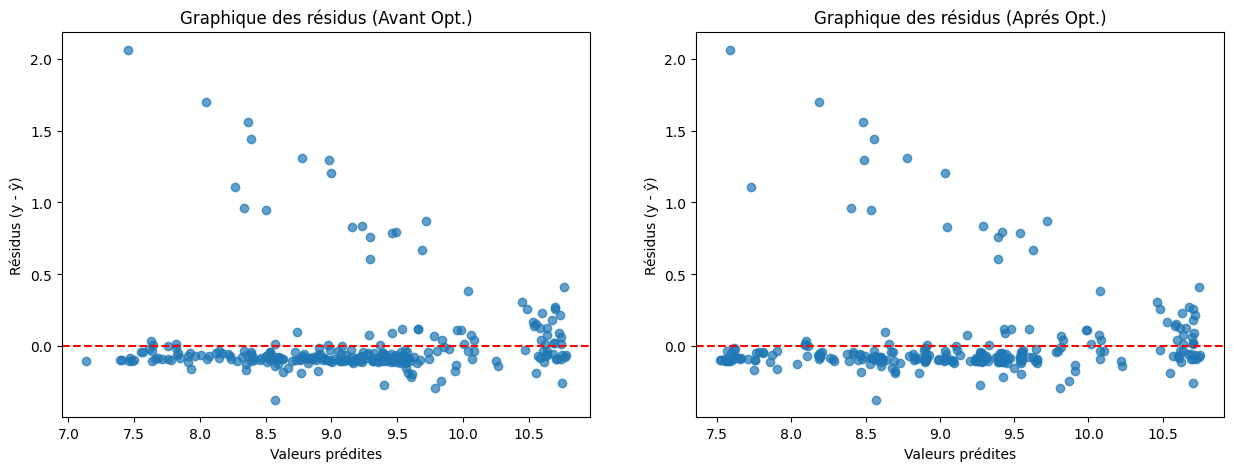

In [1016]:
y_pred1 = random_forest_model.predict(X_test)
residuals1 = y_test - y_pred

y_pred2 = best_linear_model.predict(X_test)          # Random Forest Model
residuals2 = y_test - y_pred

plt.figure(figsize=(15, 5))

# Avant Optimisation

plt.subplot(1, 2, 1)
plt.scatter(y_pred1, residuals1, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus (y - ŷ)")
plt.title("Graphique des résidus (Avant Opt.)")

# Aprés Optimisation

plt.subplot(1, 2, 2)
plt.scatter(y_pred2, residuals2, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus (y - ŷ)")
plt.title("Graphique des résidus (Aprés Opt.)")

plt.show()

- XGBoost

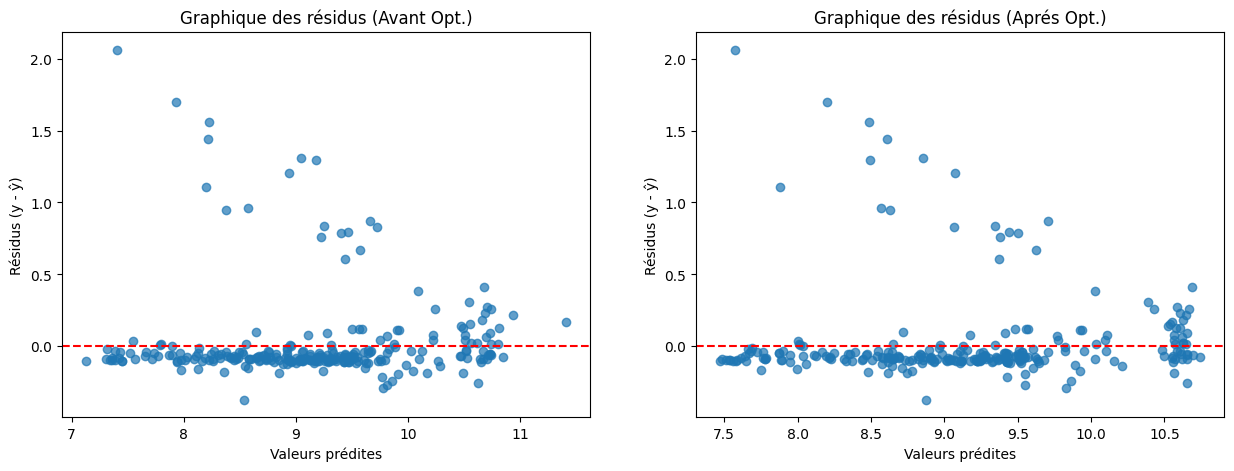

In [1018]:
y_pred1 = xgb_model.predict(X_test)
residuals1 = y_test - y_pred

y_pred2 = best_xgb_model.predict(X_test)
residuals2 = y_test - y_pred

plt.figure(figsize=(15, 5))

# Avant Optimisation

plt.subplot(1, 2, 1)
plt.scatter(y_pred1, residuals1, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus (y - ŷ)")
plt.title("Graphique des résidus (Avant Opt.)")

# Aprés Optimisation

plt.subplot(1, 2, 2)
plt.scatter(y_pred2, residuals2, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus (y - ŷ)")
plt.title("Graphique des résidus (Aprés Opt.)")

plt.show()

- SVR

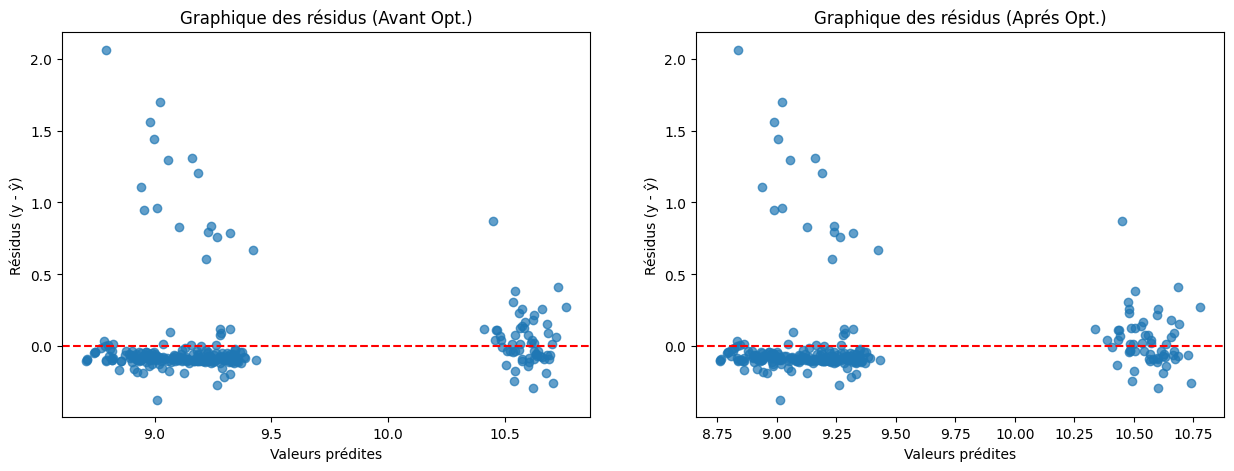

In [1022]:
y_pred1 = svr_model.predict(X_test)
residuals1 = y_test - y_pred

y_pred2 = best_svr_model.predict(X_test)
residuals2 = y_test - y_pred

plt.figure(figsize=(15, 5))

# Avant Optimisation

plt.subplot(1, 2, 1)
plt.scatter(y_pred1, residuals1, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus (y - ŷ)")
plt.title("Graphique des résidus (Avant Opt.)")

# Aprés Optimisation

plt.subplot(1, 2, 2)
plt.scatter(y_pred2, residuals2, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus (y - ŷ)")
plt.title("Graphique des résidus (Aprés Opt.)")

plt.show()

prédictions vs. réelles avec scatter plots
- Random Forest

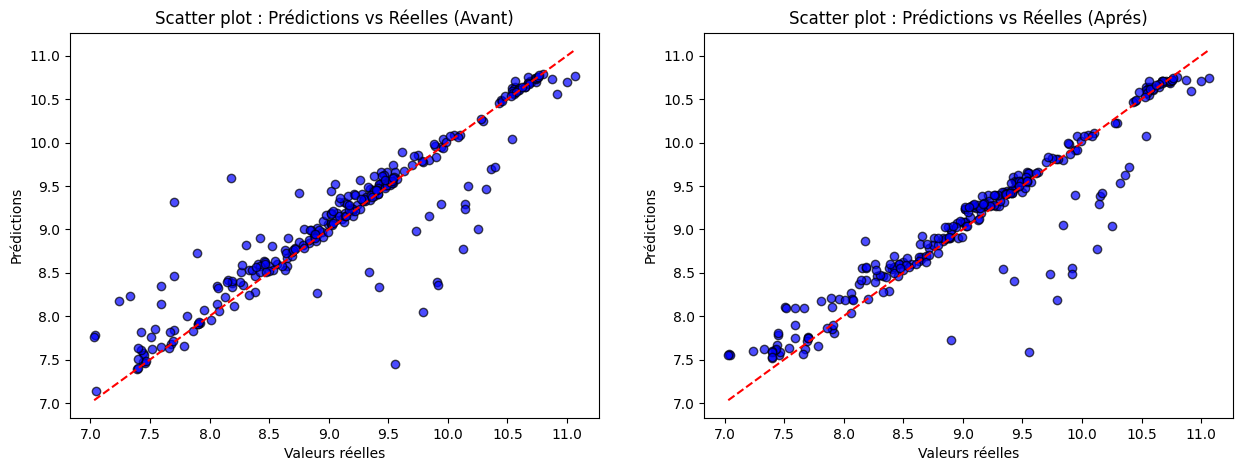

In [1031]:
y_pred1 = random_forest_model.predict(X_test)

y_pred2 = best_linear_model.predict(X_test)          # Random Forest Model

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred1, alpha=0.7, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Scatter plot : Prédictions vs Réelles (Avant)")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred2, alpha=0.7, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Scatter plot : Prédictions vs Réelles (Aprés)")

plt.show()

- XGBoost

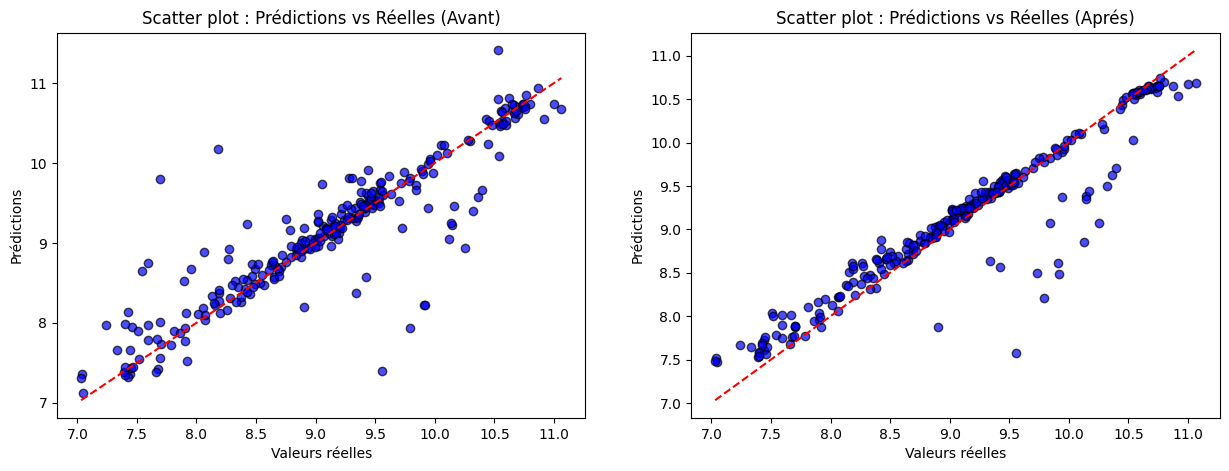

In [1030]:
y_pred1 = xgb_model.predict(X_test)

y_pred2 = best_xgb_model.predict(X_test)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred1, alpha=0.7, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Scatter plot : Prédictions vs Réelles (Avant)")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred2, alpha=0.7, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Scatter plot : Prédictions vs Réelles (Aprés)")

plt.show()

On a déja créer les Dataframes qui contient les erreurs RMSE, MAE et R2, avant et aprés l'optimisation. 

In [1051]:
combined_errors_df = pd.DataFrame()

# Avant l'optimisation

for col in models_errors_df.T.columns:
    combined_errors_df[col] = models_errors_df.T[col]

# Aprés l'optimisation

for col in opt_model_errors_df.T.columns:
    combined_errors_df[col + " (Opt)"] = opt_model_errors_df.T[col]

print(combined_errors_df)

      Linear Regression  Random Forest   XGBoost       SVR  \
RMSE           0.397761       0.372914  0.412868  0.331457   
MAE            0.261036       0.190400  0.218179  0.169418   
R2             0.829608       0.850231  0.816420  0.881680   

      Random Forest (Opt)  XGBoost (Opt)  SVR (Opt)  
RMSE             0.331481       0.323462   0.319575  
MAE              0.177831       0.180108   0.159277  
R2               0.881663       0.887319   0.890011  
